In [2]:
from scipy import misc
import matplotlib.pyplot as plt
import glob
import numpy as np
import pickle

In [3]:
cropsnames=glob.glob("/home/prapan/Documents/images/crops/*")

In [4]:
#print(cropsnames)

In [5]:
"""
cropspics=[]
xsize=100
ysize=100
for name in cropsnames:
	pic=misc.imread(name)
	cropspics.append(misc.imresize(pic,(xsize,ysize)))


In [6]:
"""
output = open('crops100.pkl', 'wb')
pickle.dump(cropspics, output)
output.close()

In [16]:
pkl_file = open('crops64.pkl', 'rb')
cropspics = pickle.load(pkl_file)
pkl_file.close()
print(len(cropspics))
print(cropspics[0].shape)
sizes = cropspics[0].shape
#print(sizes[0])
xsize = sizes[0]
ysize = sizes[1]

500
(64, 64, 3)


In [17]:
numofpics=len(cropspics)
print(cropspics[0].dtype)
print(numofpics)

uint8
500


In [18]:
print(cropspics[0].shape)

(64, 64, 3)


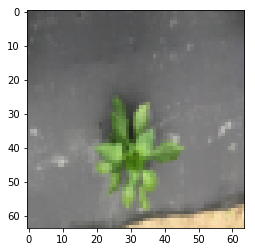

In [19]:
allimages=np.empty(shape=[numofpics,xsize,ysize,3])
for i in range(numofpics):
	allimages[i]=cropspics[i].astype(dtype="float32")
allimages/=255
plt.imshow(allimages[4])
plt.show()

In [20]:
print(allimages.shape)

(500, 64, 64, 3)


In [21]:
#print(allimages[0])

In [30]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, load_model
from keras import backend as K

In [31]:
x_train = allimages.reshape((len(allimages), np.prod(allimages.shape[1:])))
x_test = allimages.reshape((len(allimages), np.prod(allimages.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(500, 12288)
(500, 12288)


In [32]:
import tensorflow as tf
with tf.device('/cpu:0'):
    # this is the size of our encoded representations
    encoding_dim = 500  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
    # this is our input placeholder
    input_img = Input(shape=(12288,))
    print(input_img)
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='relu')(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(12288, activation='sigmoid')(encoded)
    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)
    # this model maps an input to its encoded representation
    encoder = Model(input_img, encoded)
    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # create the decoder model
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Tensor("input_7:0", shape=(?, 12288), dtype=float32, device=/device:CPU:0)


In [44]:
with tf.device('/cpu:0'):
    autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=5,
                shuffle=True,
                validation_data=(x_test, x_test))
    
# model file name
model_file_name = 'i64-autoencoder.h5'
# encoder file name
encoder_file_name = 'i64-autoencoder-encoder.h5'
# decoder file name
decoder_file_name = 'i64-autoencoder-decoder.h5'


autoencoder = load_model(model_file_name)
encoder = load_model(encoder_file_name)
decoder = load_model(decoder_file_name)

# Save trained autoencoder model
#autoencoder.save(model_file_name, overwrite=True)
# Save encoder with weights
#encoder.save(encoder_file_name, overwrite=True)
# Save decoder
#decoder.save(decoder_file_name, overwrite=True)

Train on 500 samples, validate on 500 samples
Epoch 1/1000
500/500 [==============================] - 23s - loss: 0.6731 - val_loss: 0.6727
Epoch 2/1000
500/500 [==============================] - 21s - loss: 0.6725 - val_loss: 0.6721
Epoch 3/1000
500/500 [==============================] - 19s - loss: 0.6720 - val_loss: 0.6715
Epoch 4/1000
500/500 [==============================] - 23s - loss: 0.6714 - val_loss: 0.6710
Epoch 5/1000
500/500 [==============================] - 19s - loss: 0.6709 - val_loss: 0.6705
Epoch 6/1000
500/500 [==============================] - 19s - loss: 0.6704 - val_loss: 0.6700
Epoch 7/1000
500/500 [==============================] - 19s - loss: 0.6699 - val_loss: 0.6695
Epoch 8/1000
500/500 [==============================] - 19s - loss: 0.6694 - val_loss: 0.6691
Epoch 9/1000
500/500 [==============================] - 19s - loss: 0.6690 - val_loss: 0.6687
Epoch 10/1000
500/500 [==============================] - 19s - loss: 0.6686 - val_loss: 0.6682
Epoch 11/1000

500/500 [==============================] - 19s - loss: 0.6548 - val_loss: 0.6547
Epoch 87/1000
500/500 [==============================] - 19s - loss: 0.6548 - val_loss: 0.6545
Epoch 88/1000
500/500 [==============================] - 19s - loss: 0.6547 - val_loss: 0.6544
Epoch 89/1000
500/500 [==============================] - 19s - loss: 0.6546 - val_loss: 0.6543
Epoch 90/1000
500/500 [==============================] - 19s - loss: 0.6546 - val_loss: 0.6542
Epoch 91/1000
500/500 [==============================] - 19s - loss: 0.6544 - val_loss: 0.6542
Epoch 92/1000
500/500 [==============================] - 19s - loss: 0.6544 - val_loss: 0.6545
Epoch 93/1000
500/500 [==============================] - 19s - loss: 0.6543 - val_loss: 0.6540
Epoch 94/1000
500/500 [==============================] - 19s - loss: 0.6542 - val_loss: 0.6539
Epoch 95/1000
500/500 [==============================] - 19s - loss: 0.6541 - val_loss: 0.6539
Epoch 96/1000
500/500 [==============================] - 19s - l

500/500 [==============================] - 19s - loss: 0.6496 - val_loss: 0.6498
Epoch 172/1000
500/500 [==============================] - 19s - loss: 0.6495 - val_loss: 0.6493
Epoch 173/1000
500/500 [==============================] - 19s - loss: 0.6494 - val_loss: 0.6494
Epoch 174/1000
500/500 [==============================] - 19s - loss: 0.6494 - val_loss: 0.6492
Epoch 175/1000
500/500 [==============================] - 19s - loss: 0.6494 - val_loss: 0.6491
Epoch 176/1000
500/500 [==============================] - 19s - loss: 0.6493 - val_loss: 0.6492
Epoch 177/1000
500/500 [==============================] - 19s - loss: 0.6493 - val_loss: 0.6504
Epoch 178/1000
500/500 [==============================] - 19s - loss: 0.6492 - val_loss: 0.6490
Epoch 179/1000
500/500 [==============================] - 19s - loss: 0.6492 - val_loss: 0.6490
Epoch 180/1000
500/500 [==============================] - 19s - loss: 0.6491 - val_loss: 0.6491
Epoch 181/1000
500/500 [==============================]

500/500 [==============================] - 19s - loss: 0.6463 - val_loss: 0.6461
Epoch 257/1000
500/500 [==============================] - 20s - loss: 0.6462 - val_loss: 0.6460
Epoch 258/1000
500/500 [==============================] - 19s - loss: 0.6462 - val_loss: 0.6460
Epoch 259/1000
500/500 [==============================] - 19s - loss: 0.6461 - val_loss: 0.6460
Epoch 260/1000
500/500 [==============================] - 19s - loss: 0.6461 - val_loss: 0.6459
Epoch 261/1000
500/500 [==============================] - 19s - loss: 0.6461 - val_loss: 0.6459
Epoch 262/1000
500/500 [==============================] - 19s - loss: 0.6461 - val_loss: 0.6458
Epoch 263/1000
500/500 [==============================] - 20s - loss: 0.6460 - val_loss: 0.6459
Epoch 264/1000
500/500 [==============================] - 19s - loss: 0.6460 - val_loss: 0.6458
Epoch 265/1000
500/500 [==============================] - 19s - loss: 0.6460 - val_loss: 0.6458
Epoch 266/1000
500/500 [==============================]

500/500 [==============================] - 20s - loss: 0.6438 - val_loss: 0.6436
Epoch 342/1000
500/500 [==============================] - 19s - loss: 0.6437 - val_loss: 0.6435
Epoch 343/1000
500/500 [==============================] - 19s - loss: 0.6437 - val_loss: 0.6436
Epoch 344/1000
500/500 [==============================] - 19s - loss: 0.6436 - val_loss: 0.6435
Epoch 345/1000
500/500 [==============================] - 19s - loss: 0.6436 - val_loss: 0.6435
Epoch 346/1000
500/500 [==============================] - 19s - loss: 0.6436 - val_loss: 0.6435
Epoch 347/1000
500/500 [==============================] - 20s - loss: 0.6436 - val_loss: 0.6435
Epoch 348/1000
500/500 [==============================] - 19s - loss: 0.6436 - val_loss: 0.6434
Epoch 349/1000
500/500 [==============================] - 19s - loss: 0.6435 - val_loss: 0.6434
Epoch 350/1000
500/500 [==============================] - 19s - loss: 0.6435 - val_loss: 0.6433
Epoch 351/1000
500/500 [==============================]

500/500 [==============================] - 19s - loss: 0.6417 - val_loss: 0.6416
Epoch 427/1000
500/500 [==============================] - 19s - loss: 0.6417 - val_loss: 0.6415
Epoch 428/1000
500/500 [==============================] - 19s - loss: 0.6417 - val_loss: 0.6415
Epoch 429/1000
500/500 [==============================] - 19s - loss: 0.6416 - val_loss: 0.6415
Epoch 430/1000
500/500 [==============================] - 19s - loss: 0.6416 - val_loss: 0.6415
Epoch 431/1000
500/500 [==============================] - 19s - loss: 0.6416 - val_loss: 0.6414
Epoch 432/1000
500/500 [==============================] - 19s - loss: 0.6416 - val_loss: 0.6414
Epoch 433/1000
500/500 [==============================] - 19s - loss: 0.6415 - val_loss: 0.6414
Epoch 434/1000
500/500 [==============================] - 19s - loss: 0.6415 - val_loss: 0.6414
Epoch 435/1000
500/500 [==============================] - 19s - loss: 0.6415 - val_loss: 0.6414
Epoch 436/1000
500/500 [==============================]

500/500 [==============================] - 19s - loss: 0.6400 - val_loss: 0.6398
Epoch 512/1000
500/500 [==============================] - 19s - loss: 0.6400 - val_loss: 0.6398
Epoch 513/1000
500/500 [==============================] - 19s - loss: 0.6399 - val_loss: 0.6398
Epoch 514/1000
500/500 [==============================] - 19s - loss: 0.6399 - val_loss: 0.6398
Epoch 515/1000
500/500 [==============================] - 19s - loss: 0.6399 - val_loss: 0.6398
Epoch 516/1000
500/500 [==============================] - 19s - loss: 0.6399 - val_loss: 0.6397
Epoch 517/1000
500/500 [==============================] - 19s - loss: 0.6399 - val_loss: 0.6397
Epoch 518/1000
500/500 [==============================] - 19s - loss: 0.6398 - val_loss: 0.6397
Epoch 519/1000
500/500 [==============================] - 19s - loss: 0.6398 - val_loss: 0.6397
Epoch 520/1000
500/500 [==============================] - 19s - loss: 0.6398 - val_loss: 0.6397
Epoch 521/1000
500/500 [==============================]

500/500 [==============================] - 19s - loss: 0.6385 - val_loss: 0.6384
Epoch 597/1000
500/500 [==============================] - 19s - loss: 0.6385 - val_loss: 0.6384
Epoch 598/1000
500/500 [==============================] - 19s - loss: 0.6385 - val_loss: 0.6384
Epoch 599/1000
500/500 [==============================] - 19s - loss: 0.6385 - val_loss: 0.6384
Epoch 600/1000
500/500 [==============================] - 19s - loss: 0.6384 - val_loss: 0.6383
Epoch 601/1000
500/500 [==============================] - 19s - loss: 0.6384 - val_loss: 0.6383
Epoch 602/1000
500/500 [==============================] - 19s - loss: 0.6384 - val_loss: 0.6383
Epoch 603/1000
500/500 [==============================] - 19s - loss: 0.6384 - val_loss: 0.6383
Epoch 604/1000
500/500 [==============================] - 19s - loss: 0.6384 - val_loss: 0.6383
Epoch 605/1000
500/500 [==============================] - 19s - loss: 0.6384 - val_loss: 0.6382
Epoch 606/1000
500/500 [==============================]

500/500 [==============================] - 19s - loss: 0.6372 - val_loss: 0.6371
Epoch 682/1000
500/500 [==============================] - 19s - loss: 0.6372 - val_loss: 0.6371
Epoch 683/1000
500/500 [==============================] - 19s - loss: 0.6372 - val_loss: 0.6371
Epoch 684/1000
500/500 [==============================] - 19s - loss: 0.6372 - val_loss: 0.6371
Epoch 685/1000
500/500 [==============================] - 20s - loss: 0.6372 - val_loss: 0.6371
Epoch 686/1000
500/500 [==============================] - 19s - loss: 0.6372 - val_loss: 0.6371
Epoch 687/1000
500/500 [==============================] - 19s - loss: 0.6372 - val_loss: 0.6371
Epoch 688/1000
500/500 [==============================] - 19s - loss: 0.6372 - val_loss: 0.6370
Epoch 689/1000
500/500 [==============================] - 19s - loss: 0.6371 - val_loss: 0.6370
Epoch 690/1000
500/500 [==============================] - 19s - loss: 0.6371 - val_loss: 0.6370
Epoch 691/1000
500/500 [==============================]

500/500 [==============================] - 19s - loss: 0.6362 - val_loss: 0.6361
Epoch 767/1000
500/500 [==============================] - 19s - loss: 0.6362 - val_loss: 0.6361
Epoch 768/1000
500/500 [==============================] - 19s - loss: 0.6361 - val_loss: 0.6361
Epoch 769/1000
500/500 [==============================] - 19s - loss: 0.6361 - val_loss: 0.6360
Epoch 770/1000
500/500 [==============================] - 19s - loss: 0.6361 - val_loss: 0.6360
Epoch 771/1000
500/500 [==============================] - 19s - loss: 0.6361 - val_loss: 0.6360
Epoch 772/1000
500/500 [==============================] - 19s - loss: 0.6361 - val_loss: 0.6360
Epoch 773/1000
500/500 [==============================] - 19s - loss: 0.6361 - val_loss: 0.6360
Epoch 774/1000
500/500 [==============================] - 19s - loss: 0.6361 - val_loss: 0.6360
Epoch 775/1000
500/500 [==============================] - 20s - loss: 0.6361 - val_loss: 0.6360
Epoch 776/1000
500/500 [==============================]

500/500 [==============================] - 19s - loss: 0.6352 - val_loss: 0.6351
Epoch 852/1000
500/500 [==============================] - 19s - loss: 0.6352 - val_loss: 0.6351
Epoch 853/1000
500/500 [==============================] - 19s - loss: 0.6352 - val_loss: 0.6351
Epoch 854/1000
500/500 [==============================] - 19s - loss: 0.6352 - val_loss: 0.6351
Epoch 855/1000
500/500 [==============================] - 19s - loss: 0.6352 - val_loss: 0.6351
Epoch 856/1000
500/500 [==============================] - 19s - loss: 0.6352 - val_loss: 0.6351
Epoch 857/1000
500/500 [==============================] - 19s - loss: 0.6352 - val_loss: 0.6351
Epoch 858/1000
500/500 [==============================] - 19s - loss: 0.6352 - val_loss: 0.6351
Epoch 859/1000
500/500 [==============================] - 19s - loss: 0.6352 - val_loss: 0.6351
Epoch 860/1000
500/500 [==============================] - 20s - loss: 0.6351 - val_loss: 0.6351
Epoch 861/1000
500/500 [==============================]

500/500 [==============================] - 19s - loss: 0.6344 - val_loss: 0.6343
Epoch 937/1000
500/500 [==============================] - 19s - loss: 0.6344 - val_loss: 0.6343
Epoch 938/1000
500/500 [==============================] - 19s - loss: 0.6344 - val_loss: 0.6343
Epoch 939/1000
500/500 [==============================] - 19s - loss: 0.6344 - val_loss: 0.6343
Epoch 940/1000
500/500 [==============================] - 19s - loss: 0.6344 - val_loss: 0.6343
Epoch 941/1000
500/500 [==============================] - 19s - loss: 0.6344 - val_loss: 0.6343
Epoch 942/1000
500/500 [==============================] - 19s - loss: 0.6344 - val_loss: 0.6343
Epoch 943/1000
500/500 [==============================] - 19s - loss: 0.6343 - val_loss: 0.6343
Epoch 944/1000
500/500 [==============================] - 19s - loss: 0.6343 - val_loss: 0.6343
Epoch 945/1000
500/500 [==============================] - 19s - loss: 0.6343 - val_loss: 0.6343
Epoch 946/1000
500/500 [==============================]

In [45]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [46]:
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(500, 500)
(500, 12288)


In [47]:
print(decoded_imgs[0])

[ 0.40850183  0.4370755   0.30487525 ...,  0.2004939   0.2537066
  0.19728339]


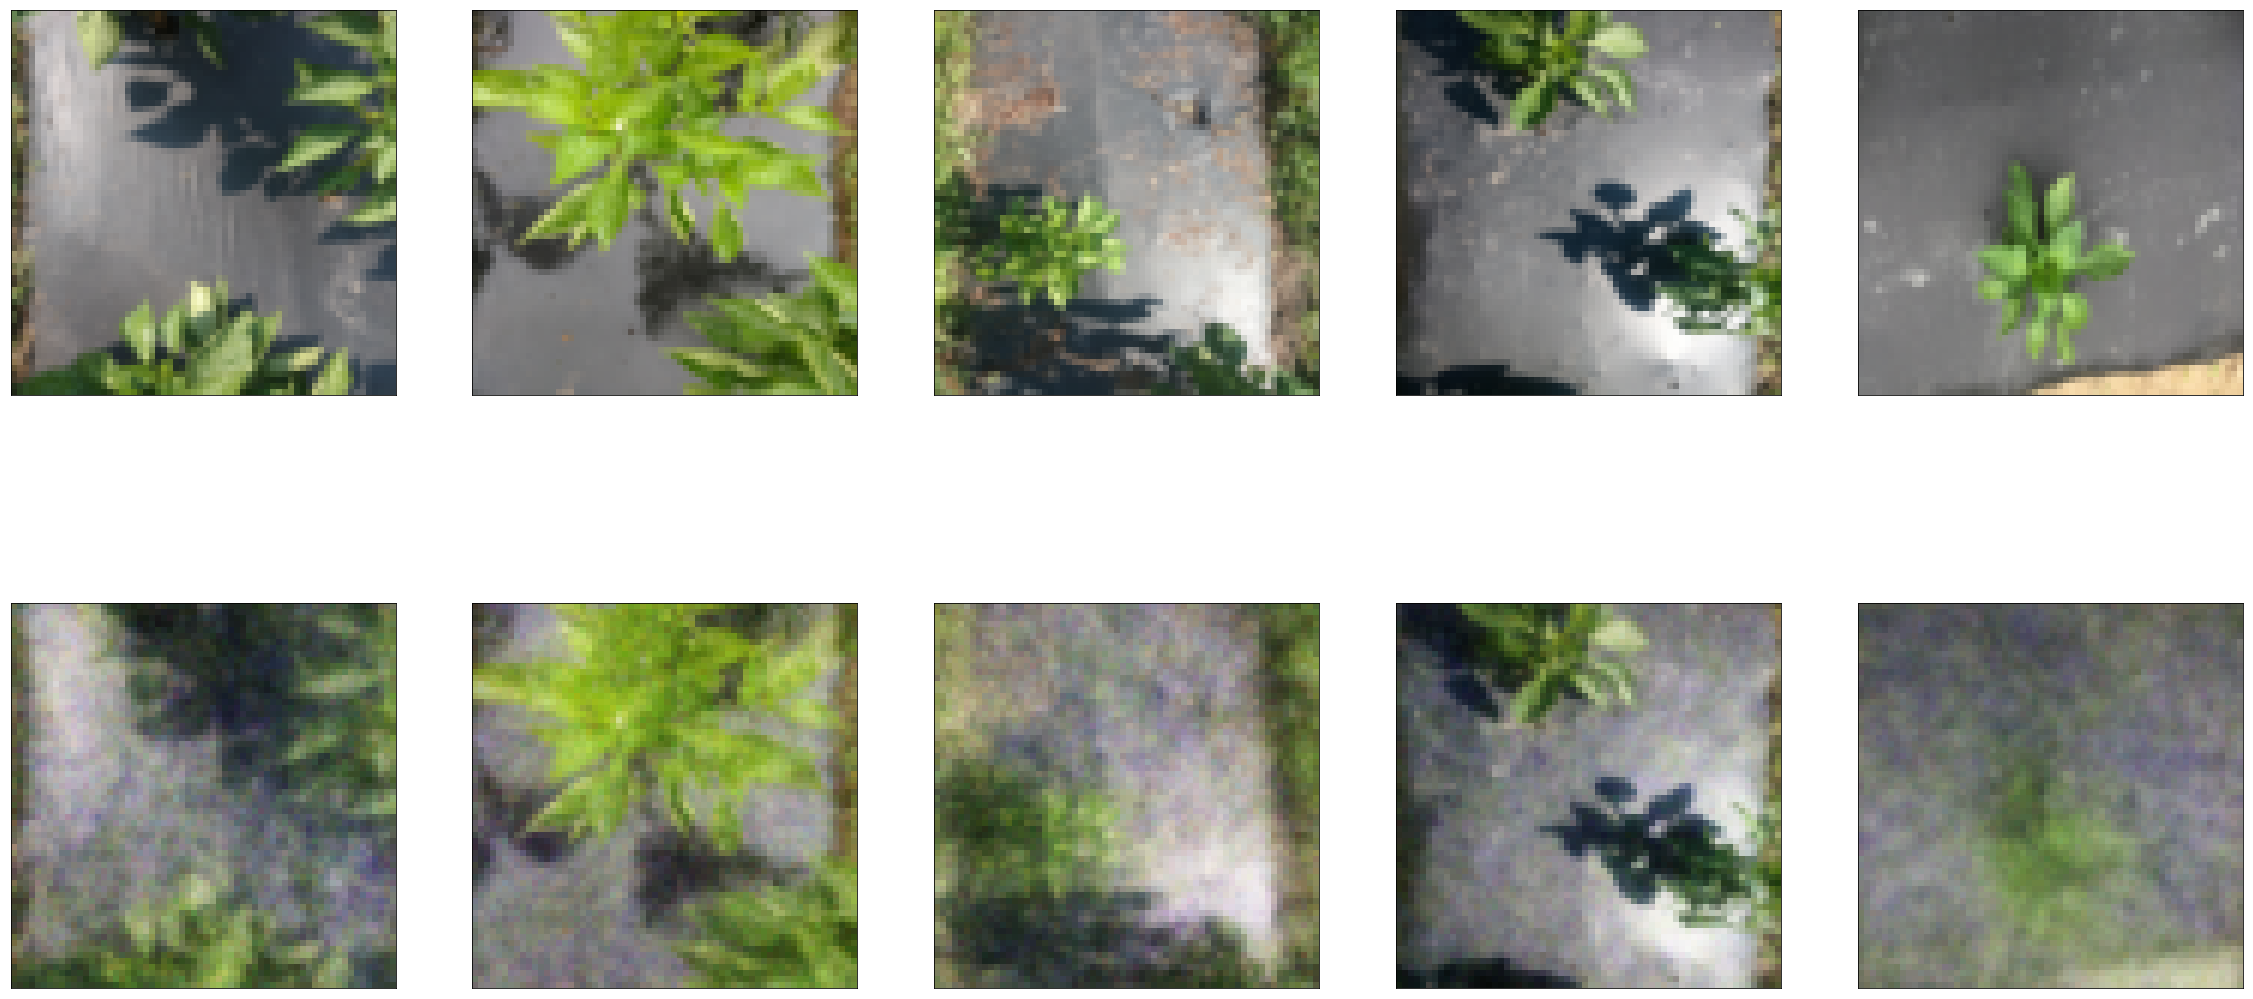

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 5  # how many digits we will display
plt.figure(figsize=(40, 20))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 256)
pca.fit(x_train)
x_pca = pca.fit_transform(x_train)
x_inverse = pca.inverse_transform(x_pca)
print(x_inverse.shape)

(500, 12288)


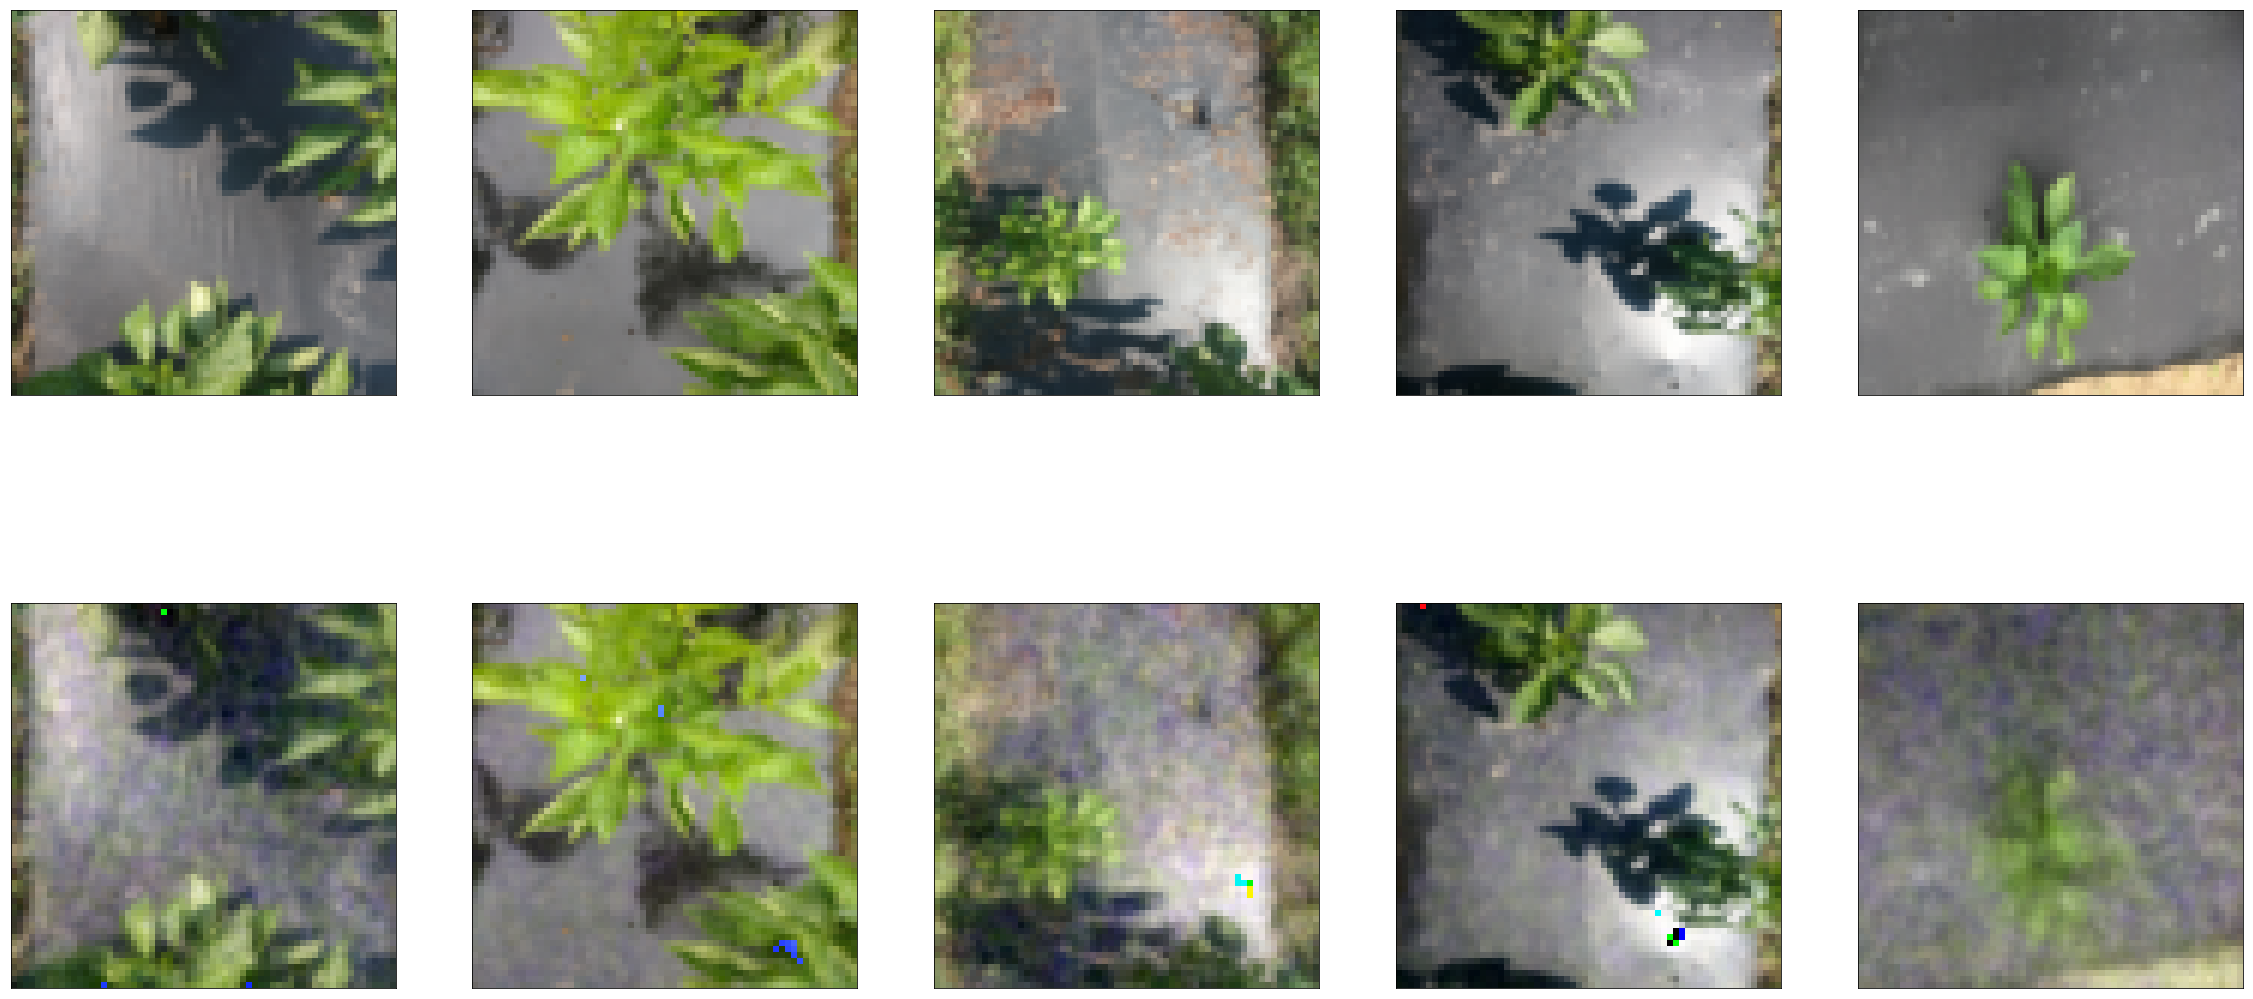

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 5  # how many digits we will display
plt.figure(figsize=(40, 20))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_inverse[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()